In [3]:
from datetime import datetime
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import requests
import json
from tqdm import tqdm
from time import sleep
import os


#import sys 
#sys.path.append("../")   aquí no es necesario porque tengo el src a la misma altura que el jupyter

from src.funciones import info_vuelos, crearDF_formateado, info_hoteles, crearDF_formateado_hoteles



In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns


In [4]:
hotel_tene_1=pd.read_csv("datos/hotel_tene_1.csv")
hotel_tene_2=pd.read_csv("datos/hotel_tene_2.csv")
hotel_tene_3=pd.read_csv("datos/hotel_tene_3.csv")
hotel_tene_4=pd.read_csv("datos/hotel_tene_4.csv")


hotel_pmi_1=pd.read_csv("datos/hotel_pmi_1.csv")
hotel_pmi_2=pd.read_csv("datos/hotel_pmi_2.csv")
hotel_pmi_3=pd.read_csv("datos/hotel_pmi_3.csv")
hotel_pmi_4=pd.read_csv("datos/hotel_pmi_4.csv")
hotel_pmi_5=pd.read_csv("datos/hotel_pmi_5.csv")
hotel_pmi_6=pd.read_csv("datos/hotel_pmi_6.csv")
hotel_pmi_7=pd.read_csv("datos/hotel_pmi_7.csv")
hotel_pmi_8=pd.read_csv("datos/hotel_pmi_8.csv")


***EDA***

***Resumen EDA:***  

**PMI**  
*Hoteles:*  
- Media reviews: dado que la media es de 322 reviews y la mediana 39 esto nos muestra que la mayoría de Hoteles tienen pocas reviews y que son unos "pocos" los que acumulan una gran cantidad de reviews(valores atípicos). Con max de 3702 y min de 0 reviews. Esto tiene sentido por su desviación tan elevada(615,91).    

- Media rating: la media(3,54) y la mediana (4) no se llevan mucho en absoluto pero dado que es sobre 5 en proporciones si que se desvían con lo que se puede decir que hay bastantes hoteles con buen rating. Unido con lo que meciono, hay que comentar que entre el cuartil 25 y el percentil 99 se agrupan 2 "puntos" mientras que en el primer 25% ya se agrupan hasta los 3 puntos (lo que significa que el 35% tienen menos de 3 de rating y el 75% más de 3 por eso la desviación positiva en la mediana).  

- Media precio medio por noche: la media y la mediana coinciden bastante (230,87 y 219,5 respectivamente). Se observa además que en el último 25% se la distribución se aumenta 300 euros mientras que en el primer 75% se acumulan otros 300 mostrando que hay mucha diferencia de precios entre los medio caros con los caros(En general tiene vastantes desviación con un 116). Con max de 631,5 y min de 30.  


*Vuelos*  
- Media duración: Observamos que la duración no varía practicamente y la media y mediana coinciden bastante mostrndo una levemente mayor agrupación de vuelos con duraciones de 85 minutos.  

- Media precios: el precio medio(87,61) es levemente menor que la mediana (102,56) lo que nos indica que hay algunos precios atípicamente bajos. Con max 112,09 y min 23,7. Todo cuadra con una desviación de 23,70.    


- La aerolinea más repetida es Iberia express con 8 vuelos(40%).  

*Actividades*  

- Media de precio: Se observa una media (61,27) levemente mayor a la mediana (54,5) reflejando que hay un sesgo hacia precios mayores debido a datos un tanto atípicos. Esto se confirma al observar que en el último 25% se da un salto considerable de 70,25 a 226. Con max del ya mencionado 226 y un min de 15,25. Observamos también una gran desviación (39,46) lo que tiene sentido debido a la variedad de actividades tan distintas entre sí.  

- La categoría de actividad más ofrecida son los paseos en barco con una frecuencia de 8 lo que implica un 25% de las actividades en Mallorca.  


**TENE**  
*Hoteles:* 
- Media reviews: dado que la media es de 109 reviews y la mediana 3 esto nos muestra que la mayoría de Hoteles tienen pocas reviews y que son unos "pocos" los que acumulan una gran cantidad de reviews. Con max de 2829 y min de 0 reviews. Esto se confirma al observar el cuartil 75 y comprobar que el 75% de los hoteles tiene menos de 32 reviews. Esto va acompañado de una desviación bastante alta de 374,92.      

- Media rating: la media(2,52) y la mediana (3,5) no se llevan mucho en absoluto pero dado que es sobre 5 en proporciones si que se desvían mucho con lo que se puede decir que hay bastantes hoteles con buen rating. Además hay que comentar que entre el cuartil 50 y el percentil 99 se agrupan 1,5 "puntos" mientras que en el primer 25% todavía se agrupan los hoteles con rating 0. Lo que más llama la atención es que en el 25% comprendido entre el cuartil 25 y el cuartil 50 se agrupan 3,5 puntos.   

- Media precio medio por noche: la media y la mediana coinciden bastante (92,03 y 88,5 respectivamente). También nos damos cuenta de que están bastante bien distribuidos los precios entre los distintos cuartiles sin mostrar grandes variaciones (26 de desviación). Con max de 178,5 y min de 26.   

*Vuelos*  
- Media duración: Observamos que la duración no varía practicamente y la media y mediana son cai iguales.  

- Media precios: el precio medio(177,45) es practicamente igual a la mediana (178,02). Con max 188,43 y min 152,2. Lo que tiene sentido con la baja desviación de 11,71.    
  
- La aerolinea más repetida es Iberia express con 10 vuelos.   


*Actividades*  

- Media de precio: Se observa una media (60,09) levemente mayor a la mediana (52,9) reflejando que hay un sesgo hacia precios mayores debido a datos un tanto atípicos. Esto se confirma al observar que en el último 25% se da un salto considerable de 84,25 a 238,95. Con max del ya mencionado 238,95 y un min de 8,05. Observamos también una gran desviación (45,33) lo que tiene sentido debido a la variedad de actividades tan distintas entre sí.

- La categoría de actividad más ofrecida son las excursiones de un día con una frecuencia de 19 lo que implica un 33% de las actividades en Tenerife.
  
***Duplicados***  
*Vuelos*  

No me preocupan los duplicados porque al estar ofreciendo paquetes de ida y vuelta, puede haber casos (que ya han sido comprobados) en los que el paquete tenga el mismo vuelo de ida pero distintos vuelos de vuelta.   
Por eso decido dejarlos para que cuenten también como opcion.

*Hoteles*

Finalmente se decidío eliminar los duplicados porque se descartó que fuera la misma franquicia en lugares distintos de la isla.


*Actividades* 

No se contaba con ninguna actividad duplicada.  


***Nulos***   
*Hoteles*  

Hay datos nulos en el precio medio asi que habrá que gestionarlo en algun momento

- Se pierde un 33,94% de tenerife si se eliminan los nulos     
- Se pierde un 28,24% de pmi si se eliminan los nulos   
- Respecto al total, se pierde un 30%.  

Me planteo rellenarlo con la media


*Vuelos*  

- No hay nulos.   

*Actividades*   

- No hay nulos. 





In [5]:
df_hoteles_pmi=pd.DataFrame()
df_hoteles_pmi= pd.concat([df_hoteles_pmi,hotel_pmi_1,hotel_pmi_2,hotel_pmi_3,hotel_pmi_4,hotel_pmi_5,hotel_pmi_6,hotel_pmi_7,hotel_pmi_8], ignore_index= True)

In [6]:
df_hoteles_tene=pd.DataFrame()
df_hoteles_tene= pd.concat([df_hoteles_tene,hotel_tene_1,hotel_tene_2,hotel_tene_3,hotel_tene_4], ignore_index= True)

In [7]:
df_hoteles_total= pd.DataFrame()
df_hoteles_total=pd.concat([df_hoteles_total,df_hoteles_pmi,df_hoteles_tene], ignore_index= True)

**Hoteles**

In [8]:
df_hoteles_pmi.describe().T


,count,mean,std,min,25%,50%,75%,max
reviews_hotel,216.0,322.356481,615.907421,0.0,2.00,39.0,336.75,3702.0
rating_hotel,216.0,3.537037,1.624956,0.0,3.00,4.0,4.50,5.0
precio_medio_por noche,155.0,230.874194,116.262796,30.0,150.25,219.5,300.25,631.5


In [9]:
df_hoteles_pmi.describe(include="O").T

,count,unique,top,freq
nombre_hotel,216,204,Metropolitan Juka Playa,3
ciudad,216,1,Palma de Mallorca,216
servicios,216,75,[],67
link,216,206,https://www.tripadvisor.com/Hotel_Review-g1874...,2


In [10]:
df_hoteles_pmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nombre_hotel            216 non-null    object 
 1   reviews_hotel           216 non-null    int64  
 2   rating_hotel            216 non-null    float64
 3   precio_medio_por noche  155 non-null    float64
 4   ciudad                  216 non-null    object 
 5   servicios               216 non-null    object 
 6   link                    216 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.9+ KB


In [76]:
df_hoteles_total.isna().sum()

nombre_hotel               0
reviews_hotel              0
rating_hotel               0
precio_medio_por noche    98
ciudad                     0
servicios                  0
link                       0
dtype: int64

**Nulos en hoteles**

*Hay datos nulos en el precio medio asi que habrá que gestionarlo en algun momento*  

se pierde un 33,94% de tenerife si se eliminan los nulos     
se pierde un 28,24% de pmi si se eliminan los nulos   
respecto al total, se pierde un 30% respecto al total

Me planteo rellenarlo con la media

In [11]:
df_hoteles_tene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nombre_hotel            109 non-null    object 
 1   reviews_hotel           109 non-null    int64  
 2   rating_hotel            109 non-null    float64
 3   precio_medio_por noche  72 non-null     float64
 4   ciudad                  109 non-null    object 
 5   servicios               109 non-null    object 
 6   link                    109 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.1+ KB


In [12]:
df_hoteles_tene.describe().T

,count,mean,std,min,25%,50%,75%,max
reviews_hotel,109.0,108.733945,374.916673,0.0,0.000,3.0,32.000,2829.0
rating_hotel,109.0,2.518349,1.995280,0.0,0.000,3.5,4.000,5.0
precio_medio_por noche,72.0,92.027778,36.722397,26.0,63.125,88.5,121.125,178.5


In [13]:
df_hoteles_tene.describe(include="O").T

,count,unique,top,freq
nombre_hotel,109,102,Montes de Anaga Hostel,2
ciudad,109,1,Santa Cruz de Tenerife,109
servicios,109,26,[],61
link,109,102,https://www.tripadvisor.com/Hotel_Review-g1874...,2


**Duplicados en Hoteles**    

Estos duplicados si que se van a dropear:  
 
- Porque se descartó que fuera la misma franquicia en lugares distintos de la isla.


In [ ]:
df_hoteles_pmi.duplicated().sum()

10

In [ ]:
df_hoteles_tene.duplicated().sum()


7

In [ ]:
df_hoteles_total.duplicated().sum()

17

In [53]:
ver_duplicado=df_hoteles_total[df_hoteles_total["nombre_hotel"]== "Borne Suites"]
ver_duplicado

,nombre_hotel,reviews_hotel,rating_hotel,precio_medio_por noche,ciudad,servicios,link
95,Borne Suites,11,4.5,301.5,Palma de Mallorca,['Free Wifi'],https://www.tripadvisor.com/Hotel_Review-g1874...
125,Borne Suites,11,4.5,301.5,Palma de Mallorca,['Free Wifi'],https://www.tripadvisor.com/Hotel_Review-g1874...


In [54]:
duplicados = df_hoteles_total[df_hoteles_total.duplicated()]
print(duplicados)

                    nombre_hotel  reviews_hotel  rating_hotel  \
125                 Borne Suites             11           4.5   
126         The Hype Beach House             17           4.5   
127            Palma Port Hostel             38           4.0   
129          Remolars3 Townhouse              8           4.5   
135                 The Boc City             12           4.0   
137  Agroturismo Finca Son Amora              2           5.0   
140     El Josemari Youth Hostel             14           3.5   
149      Metropolitan Juka Playa              1           5.0   
172           Urban Hostel Palma             88           3.0   
183               New Art Hostel             65           2.5   
246     Hotel Boutique San Diego             33           5.0   
252         Hotel Adonis Capital            201           3.5   
259        Hotel F24 Emblematico             10           5.0   
260       Montes de Anaga Hostel             42           4.0   
262  Hotel Emblemático Hi

In [59]:
df_hoteles_pmi.drop_duplicates(inplace=True)
df_hoteles_tene.drop_duplicates(inplace=True)
df_hoteles_total.drop_duplicates(inplace=True)

In [57]:
df_hoteles_pmi.duplicated().sum()

0

In [14]:
df_hoteles_total.head()

,nombre_hotel,reviews_hotel,rating_hotel,precio_medio_por noche,ciudad,servicios,link
0,Hotel Costa Azul,2081,4.5,177.0,Palma de Mallorca,"['Free Wifi', 'Pool', 'Indoor pool', 'Restaura...",https://www.tripadvisor.com/Hotel_Review-g1874...
1,Hotel Victoria Gran Meliá,2447,4.5,270.0,Palma de Mallorca,"['Free Wifi', 'Pool', 'Heated pool', 'Indoor p...",https://www.tripadvisor.com/Hotel_Review-g1874...
2,Nakar Hotel,2327,5.0,349.5,Palma de Mallorca,"['Free Wifi', 'Breakfast included', 'Pool', 'H...",https://www.tripadvisor.com/Hotel_Review-g1874...
3,INNSiDE Palma Bosque,1082,4.5,160.0,Palma de Mallorca,"['Free Wifi', 'Indoor pool', 'Outdoor pool', '...",https://www.tripadvisor.com/Hotel_Review-g1874...
4,BQ Belvedere Hotel,3702,4.0,154.0,Palma de Mallorca,"['Free parking', 'Pool', 'Outdoor pool', 'Rest...",https://www.tripadvisor.com/Hotel_Review-g1874...


In [15]:
df_hoteles_total.shape

(325, 7)

In [16]:
df_hoteles_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nombre_hotel            325 non-null    object 
 1   reviews_hotel           325 non-null    int64  
 2   rating_hotel            325 non-null    float64
 3   precio_medio_por noche  227 non-null    float64
 4   ciudad                  325 non-null    object 
 5   servicios               325 non-null    object 
 6   link                    325 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 17.9+ KB


Los describes no me sirven en el total porque lo que quiero es comparar. (Para visualizar haré group by)

In [17]:
df_hoteles_total.describe()

,reviews_hotel,rating_hotel,precio_medio_por noche
count,325.000000,325.000000,227.000000
mean,250.710769,3.195385,186.834802
std,555.681044,1.819682,117.592932
min,0.000000,0.000000,26.000000
25%,1.000000,2.000000,96.500000
50%,14.000000,4.000000,159.000000
75%,198.000000,4.500000,254.000000
max,3702.000000,5.000000,631.500000


**Vuelos**

In [18]:
vuelos_pmi=pd.read_csv("datos/vuelos_pmi.csv")
vuelos_tene=pd.read_csv("datos/vuelos_tene.csv")

In [19]:
vuelos_pmi.head()

,id_vuelo,id_origen,ciudad_origen,id_destino,ciudad_destino,salida,llegada,duracion(min),escalas,aerolinea,precio
0,13870-2411030835--31915-0-15434-2411031005,MAD,Madrid,PMI,Palma,2024-11-03 08:35:00,2024-11-03 10:05:00,90,0,Ryanair,53.92
1,15434-2411062220--31915-0-13870-2411062350,PMI,Palma,MAD,Madrid,2024-11-06 22:20:00,2024-11-06 23:50:00,90,0,Ryanair,53.92
2,13870-2411030705--32221-0-15434-2411030830,MAD,Madrid,PMI,Palma,2024-11-03 07:05:00,2024-11-03 08:30:00,85,0,Iberia Express,46.60
3,15434-2411062220--31915-0-13870-2411062350,PMI,Palma,MAD,Madrid,2024-11-06 22:20:00,2024-11-06 23:50:00,90,0,Ryanair,46.60
4,13870-2411031115--31915-0-15434-2411031245,MAD,Madrid,PMI,Palma,2024-11-03 11:15:00,2024-11-03 12:45:00,90,0,Ryanair,101.24


In [61]:
vuelos_pmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_vuelo        20 non-null     object 
 1   id_origen       20 non-null     object 
 2   ciudad_origen   20 non-null     object 
 3   id_destino      20 non-null     object 
 4   ciudad_destino  20 non-null     object 
 5   salida          20 non-null     object 
 6   llegada         20 non-null     object 
 7   duracion(min)   20 non-null     int64  
 8   escalas         20 non-null     int64  
 9   aerolinea       20 non-null     object 
 10  precio          20 non-null     float64
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ KB


In [21]:
vuelos_pmi.describe().T

,count,mean,std,min,25%,50%,75%,max
duracion(min),20.0,86.750,2.446802,85.0,85.00,85.000,90.00,90.00
escalas,20.0,0.000,0.000000,0.0,0.00,0.000,0.00,0.00
precio,20.0,87.613,23.704194,46.6,68.08,102.555,103.87,112.09


In [22]:
vuelos_pmi.describe(include="O").T

,count,unique,top,freq
id_vuelo,20,12,13870-2411030705--32221-0-15434-2411030830,5
id_origen,20,2,MAD,10
ciudad_origen,20,2,Madrid,10
id_destino,20,2,PMI,10
ciudad_destino,20,2,Palma,10
salida,20,9,2024-11-03 07:05:00,7
llegada,20,9,2024-11-03 08:30:00,7
aerolinea,20,4,Iberia Express,8


In [23]:
vuelos_tene.head()

,id_vuelo,id_origen,ciudad_origen,id_destino,ciudad_destino,salida,llegada,duracion(min),escalas,aerolinea,precio
0,13870-2411030620--32221-0-16864-2411030815,MAD,Madrid,TFN,Tenerife,2024-11-03 06:20:00,2024-11-03 08:15:00,175,0,Iberia Express,152.20
1,16864-2411062125--32221-0-13870-2411070115,TFN,Tenerife,MAD,Madrid,2024-11-06 21:25:00,2024-11-07 01:15:00,170,0,Iberia Express,152.20
2,13870-2411030705--32680-0-16864-2411030855,MAD,Madrid,TFN,Tenerife,2024-11-03 07:05:00,2024-11-03 08:55:00,170,0,Air Europa,176.68
3,16864-2411061755--32680-0-13870-2411062140,TFN,Tenerife,MAD,Madrid,2024-11-06 17:55:00,2024-11-06 21:40:00,165,0,Air Europa,176.68
4,13870-2411030620--32221-0-16864-2411030815,MAD,Madrid,TFN,Tenerife,2024-11-03 06:20:00,2024-11-03 08:15:00,175,0,Iberia Express,176.93


In [24]:
vuelos_tene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_vuelo        20 non-null     object 
 1   id_origen       20 non-null     object 
 2   ciudad_origen   20 non-null     object 
 3   id_destino      20 non-null     object 
 4   ciudad_destino  20 non-null     object 
 5   salida          20 non-null     object 
 6   llegada         20 non-null     object 
 7   duracion(min)   20 non-null     int64  
 8   escalas         20 non-null     int64  
 9   aerolinea       20 non-null     object 
 10  precio          20 non-null     float64
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ KB


In [25]:
vuelos_tene.describe().T

,count,mean,std,min,25%,50%,75%,max
duracion(min),20.0,170.250,4.722566,165.0,165.00,170.000,175.00,175.00
escalas,20.0,0.000,0.000000,0.0,0.00,0.000,0.00,0.00
precio,20.0,177.446,11.718194,152.2,172.58,178.015,188.13,188.43


In [26]:
vuelos_tene.describe(include="O").T

,count,unique,top,freq
id_vuelo,20,13,13870-2411030620--32221-0-16864-2411030815,5
id_origen,20,2,MAD,10
ciudad_origen,20,2,Madrid,10
id_destino,20,2,TFN,10
ciudad_destino,20,2,Tenerife,10
salida,20,8,2024-11-03 06:20:00,9
llegada,20,8,2024-11-03 08:15:00,9
aerolinea,20,3,Iberia Express,10


In [27]:
vuelos_tene.shape

(20, 11)

In [28]:
vuelos_pmi.shape

(20, 11)

**Duplicados**  
  
No me preocupan los duplicados porque al estar ofreciendo paquetes de ida y vuelta, puede haber casos en los que el paquete tenga el mismo vuelo de ida pero distintos vuelos de vuelta. 

Por eso decido dejarlos para que cuenten también como opcion.

In [29]:
vuelos_pmi.duplicated().sum()

2

In [30]:
vuelos_tene.duplicated().sum()

2

In [67]:
ver_duplicado=vuelos_pmi[vuelos_pmi["id_vuelo"]== "13870-2411030705--32221-0-15434-2411030830"]
ver_duplicado

,id_vuelo,id_origen,ciudad_origen,id_destino,ciudad_destino,salida,llegada,duracion(min),escalas,aerolinea,precio
2,13870-2411030705--32221-0-15434-2411030830,MAD,Madrid,PMI,Palma,2024-11-03 07:05:00,2024-11-03 08:30:00,85,0,Iberia Express,46.60
8,13870-2411030705--32221-0-15434-2411030830,MAD,Madrid,PMI,Palma,2024-11-03 07:05:00,2024-11-03 08:30:00,85,0,Iberia Express,103.87
10,13870-2411030705--32221-0-15434-2411030830,MAD,Madrid,PMI,Palma,2024-11-03 07:05:00,2024-11-03 08:30:00,85,0,Iberia Express,103.87
14,13870-2411030705--32221-0-15434-2411030830,MAD,Madrid,PMI,Palma,2024-11-03 07:05:00,2024-11-03 08:30:00,85,0,Iberia Express,103.87
18,13870-2411030705--32221-0-15434-2411030830,MAD,Madrid,PMI,Palma,2024-11-03 07:05:00,2024-11-03 08:30:00,85,0,Iberia Express,68.08


In [66]:
vuelos_pmi[vuelos_pmi.duplicated()]

,id_vuelo,id_origen,ciudad_origen,id_destino,ciudad_destino,salida,llegada,duracion(min),escalas,aerolinea,precio
10,13870-2411030705--32221-0-15434-2411030830,MAD,Madrid,PMI,Palma,2024-11-03 07:05:00,2024-11-03 08:30:00,85,0,Iberia Express,103.87
14,13870-2411030705--32221-0-15434-2411030830,MAD,Madrid,PMI,Palma,2024-11-03 07:05:00,2024-11-03 08:30:00,85,0,Iberia Express,103.87


Actividades

In [31]:
actividades_pmi=pd.read_csv("datos/actividades_pmi.csv")
actividades_tene=pd.read_csv("datos/actividades_tene.csv")

In [32]:
actividades_pmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   actividades  32 non-null     object 
 1   categorias   32 non-null     object 
 2   descripcion  32 non-null     object 
 3   precio       32 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


In [33]:
actividades_tene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   actividades  58 non-null     object 
 1   categorias   58 non-null     object 
 2   descripcion  58 non-null     object 
 3   precio       58 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.9+ KB


In [34]:
actividades_tene.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,58.0,65.094828,45.325983,8.05,32.1,52.9,84.25,238.95


In [35]:
actividades_tene.describe(include= "O").T

,count,unique,top,freq
actividades,58,58,Ruta de misterios y leyendas por Santa Cruz de...,1
categorias,58,13,Excursiones de un día,19
descripcion,58,58,"Disfruta de una fantástica noche de miedo, pai...",1


In [71]:
actividades_pmi.duplicated().sum()

0

In [72]:
actividades_tene.duplicated().sum()

0

In [36]:
actividades_pmi.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,32.0,61.267187,39.4551,15.25,35.7375,54.5,70.25,226.0


In [37]:
actividades_pmi.describe(include= "O").T

,count,unique,top,freq
actividades,32,32,Visita guiada por Palma de Mallorca con entrad...,1
categorias,32,12,Paseos en barco,8
descripcion,32,32,Descubra los lugares más famosos de Palma de ...,1


**Visualización**


**PMI**

VUELOS

In [99]:
numero_vuelos_pmi=vuelos_pmi["aerolinea"].value_counts()
numero_vuelos_pmi

aerolinea
Iberia Express    8
Ryanair           7
Iberia            4
Air Europa        1
Name: count, dtype: int64

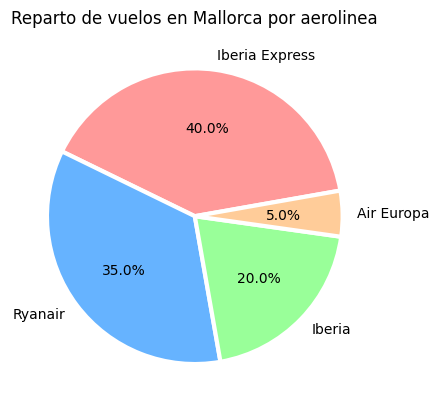

In [105]:
colores_pmi = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
aerolinea_pmi= ["Iberia Express", "Ryanair", "Iberia", "Air Europa"]
plt.pie(numero_vuelos_pmi, labels= aerolinea_pmi, colors= colores_pmi, labeldistance=1.10, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct= '%1.1f%%',  startangle= 10)
plt.title("Reparto de vuelos en Mallorca por aerolinea");

C:\Users\jaime\AppData\Local\Temp\ipykernel_24708\686270965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "aerolinea", y= "precio", data= vuelos_pmi, palette=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])


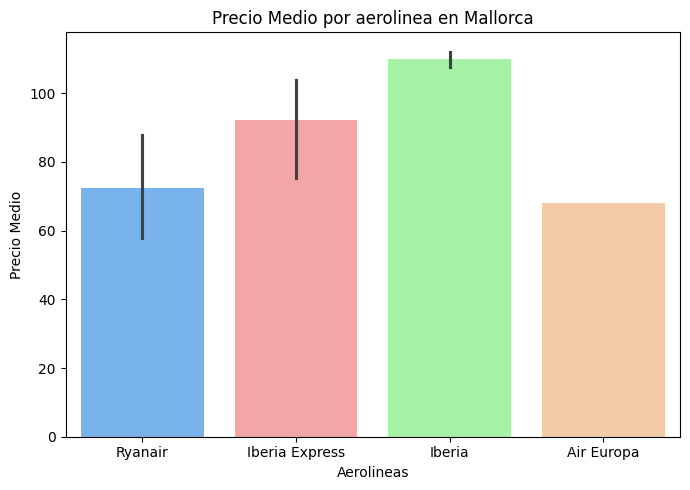

In [117]:
plt.figure(figsize= (7,5))
sns.barplot(x = "aerolinea", y= "precio", data= vuelos_pmi, palette=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])
plt.title("Precio Medio por aerolinea en Mallorca")
plt.xlabel("Aerolineas")
plt.ylabel("Precio Medio")
plt.tight_layout();

HOTELES


In [123]:
df_hoteles_pmi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 0 to 215
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nombre_hotel            206 non-null    object 
 1   reviews_hotel           206 non-null    int64  
 2   rating_hotel            206 non-null    float64
 3   precio_medio_por noche  145 non-null    float64
 4   ciudad                  206 non-null    object 
 5   servicios               206 non-null    object 
 6   link                    206 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.9+ KB


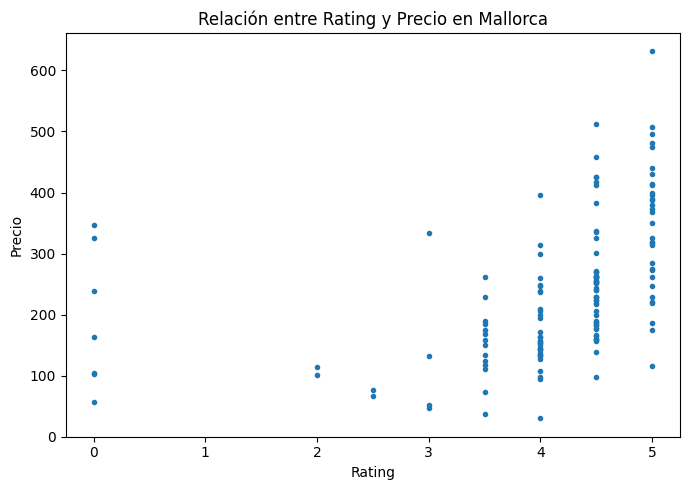

In [124]:
plt.figure(figsize= (7,5))
plt.scatter(x= "rating_hotel", y= "precio_medio_por noche" , data= df_hoteles_pmi, s=9)
plt.xlabel("Rating")
plt.ylabel("Precio")
plt.title("Relación entre Rating y Precio en Mallorca")
plt.tight_layout();

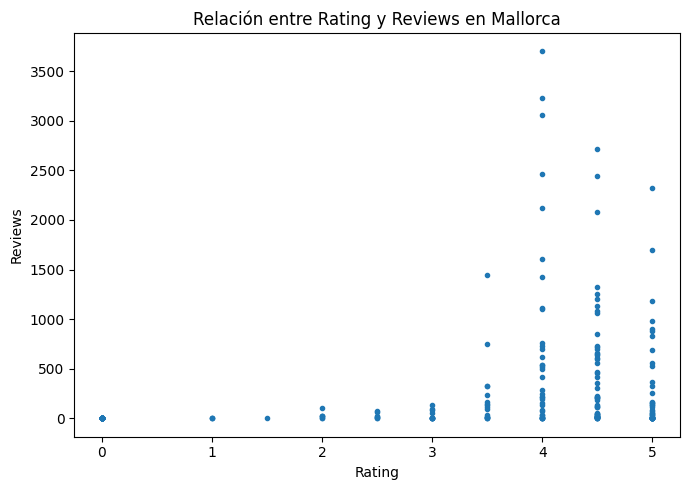

In [128]:
plt.figure(figsize= (7,5))
plt.scatter(x= "rating_hotel", y= "reviews_hotel" , data= df_hoteles_pmi, s=9)
plt.xlabel("Rating")
plt.ylabel("Reviews")
plt.title("Relación entre Rating y Reviews en Mallorca")
plt.tight_layout();

ACTIVIDADES

In [146]:
actividades_pmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   actividades  32 non-null     object 
 1   categorias   32 non-null     object 
 2   descripcion  32 non-null     object 
 3   precio       32 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


C:\Users\jaime\AppData\Local\Temp\ipykernel_24708\2394414622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "categorias", y= "precio", data= actividades_pmi, palette= "mako")


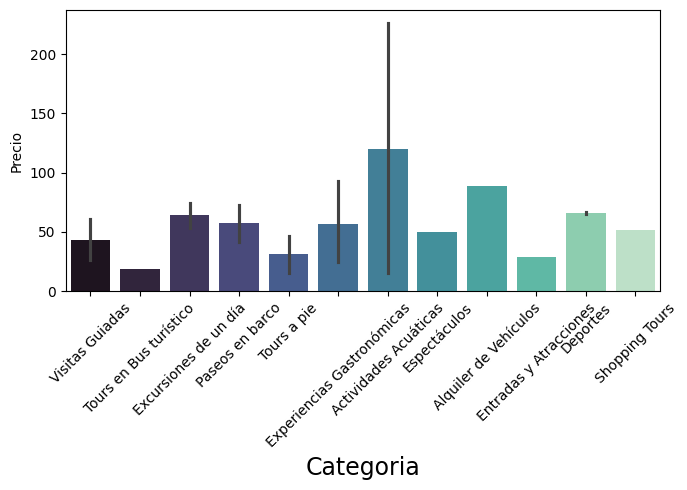

In [147]:
plt.figure(figsize= (7,5))
sns.barplot(x= "categorias", y= "precio", data= actividades_pmi, palette= "mako")
plt.xlabel("Categoria", fontsize= 17)
plt.ylabel("Precio")
plt.xticks(rotation= 45)
plt.tight_layout();

**TENE**

VUELOS

In [101]:
numero_vuelos_tene=vuelos_tene["aerolinea"].value_counts()
numero_vuelos_tene

aerolinea
Iberia Express    10
Iberia             8
Air Europa         2
Name: count, dtype: int64

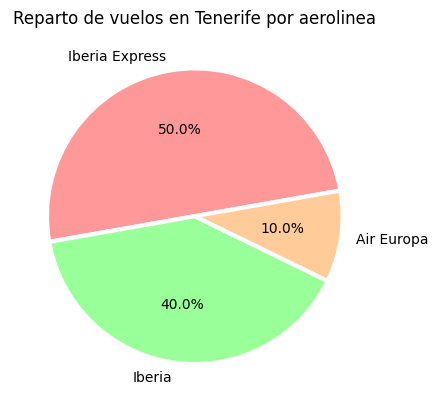

In [104]:
colores_tene = ['#ff9999', '#99ff99', '#ffcc99']
aerolinea_tene= ["Iberia Express", "Iberia", "Air Europa"]
plt.pie(numero_vuelos_tene, labels= aerolinea_tene, colors= colores_tene, labeldistance=1.10, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct= '%1.1f%%',  startangle= 10)
plt.title("Reparto de vuelos en Tenerife por aerolinea");

C:\Users\jaime\AppData\Local\Temp\ipykernel_24708\661001140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "aerolinea", y= "precio", data= vuelos_tene, palette=['#ff9999', '#ffcc99','#99ff99'])


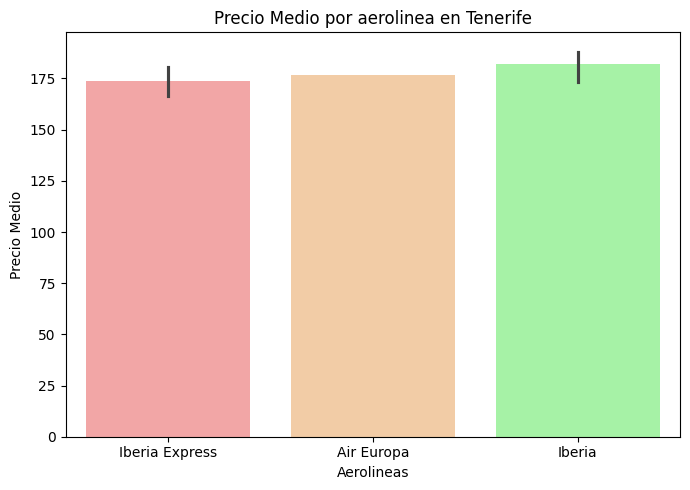

In [112]:
plt.figure(figsize= (7,5))
sns.barplot(x = "aerolinea", y= "precio", data= vuelos_tene, palette=['#ff9999', '#ffcc99','#99ff99'])
plt.title("Precio Medio por aerolinea en Tenerife")
plt.xlabel("Aerolineas")
plt.ylabel("Precio Medio")
plt.tight_layout();

HOTELES

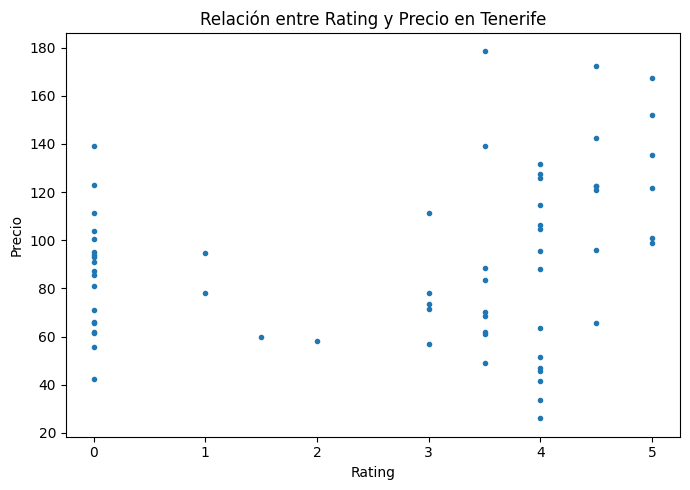

In [125]:
plt.figure(figsize= (7,5))
plt.scatter(x= "rating_hotel", y= "precio_medio_por noche" , data= df_hoteles_tene, s=9)
plt.xlabel("Rating")
plt.ylabel("Precio")
plt.title("Relación entre Rating y Precio en Tenerife")
plt.tight_layout();

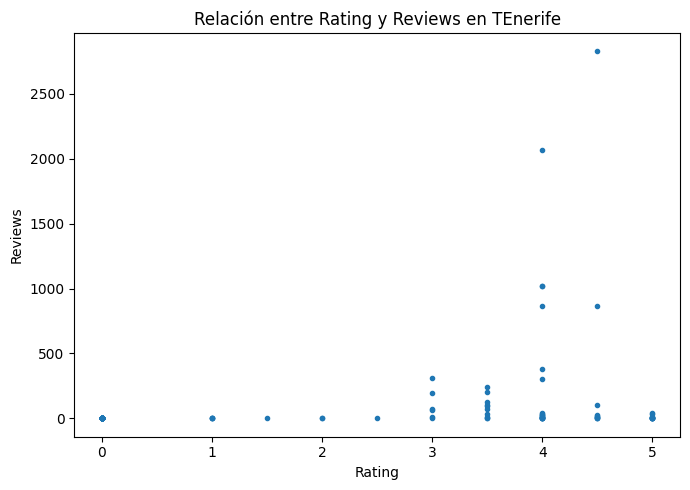

In [129]:
plt.figure(figsize= (7,5))
plt.scatter(x= "rating_hotel", y= "reviews_hotel" , data= df_hoteles_tene, s=9)
plt.xlabel("Rating")
plt.ylabel("Reviews")
plt.title("Relación entre Rating y Reviews en TEnerife")
plt.tight_layout();

ACTIVIDADES

**AGREGADOS (hoteles)**

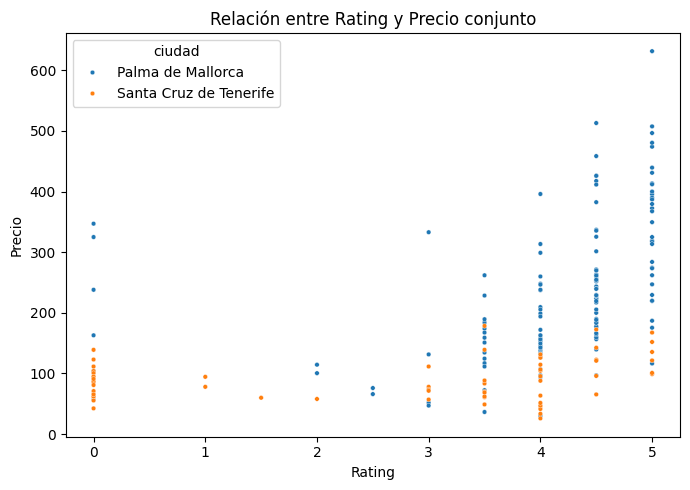

In [137]:
plt.figure(figsize= (7,5))
sns.scatterplot(x= "rating_hotel", y= "precio_medio_por noche" ,hue= "ciudad", data= df_hoteles_total, s=11)
plt.xlabel("Rating")
plt.ylabel("Precio")
plt.title("Relación entre Rating y Precio conjunto")
plt.tight_layout();

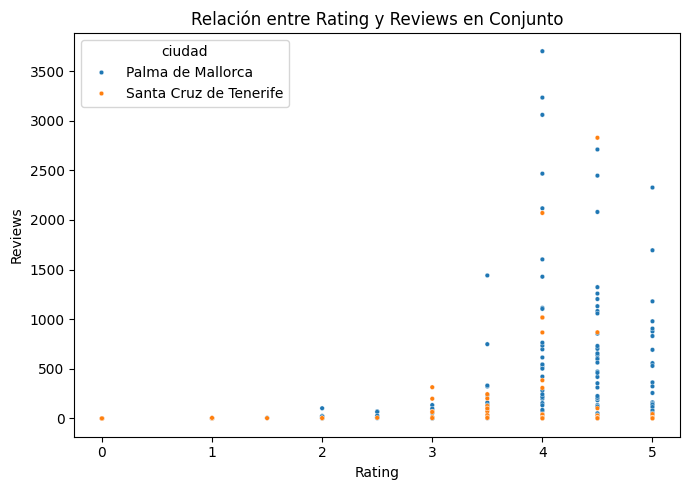

In [136]:
plt.figure(figsize= (7,5))
sns.scatterplot(x= "rating_hotel", y= "reviews_hotel", hue= "ciudad" , data= df_hoteles_total, s=11)
plt.xlabel("Rating")
plt.ylabel("Reviews")
plt.title("Relación entre Rating y Reviews en Conjunto")
plt.tight_layout();

C:\Users\jaime\AppData\Local\Temp\ipykernel_24708\3660959486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "ciudad", y= "precio_medio_por noche", data= df_hoteles_total, palette= 'viridis')


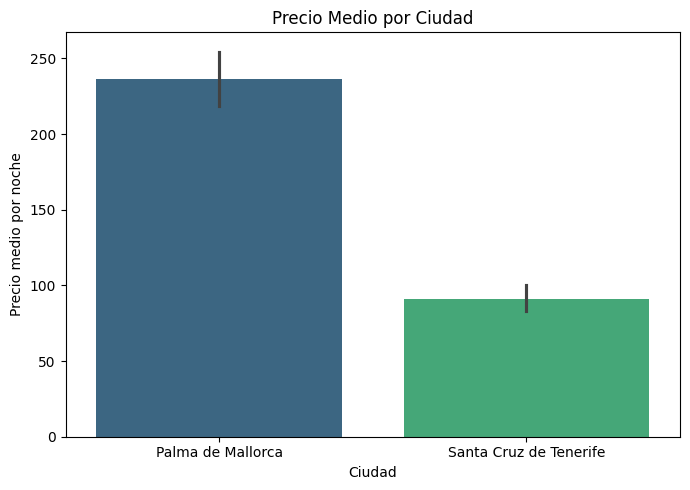

In [144]:
plt.figure(figsize= (7,5))
sns.barplot(x = "ciudad", y= "precio_medio_por noche", data= df_hoteles_total, palette= 'viridis')
plt.title("Precio Medio por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Precio medio por noche")
plt.tight_layout();

C:\Users\jaime\AppData\Local\Temp\ipykernel_24708\3154198814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="ciudad" , y = "precio_medio_por noche", data= df_hoteles_total, palette= 'viridis')


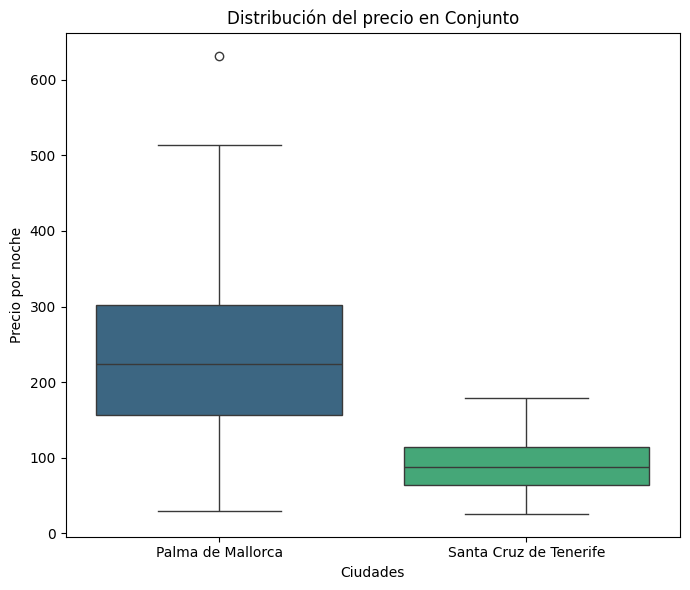

In [143]:
plt.figure(figsize= (7,6)) 
sns.boxplot(x="ciudad" , y = "precio_medio_por noche", data= df_hoteles_total, palette= 'viridis')
plt.xlabel("Ciudades")
plt.ylabel("Precio por noche")
plt.title("Distribución del precio en Conjunto")
plt.tight_layout();